In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Plottings of training and validation results and losses

In [ ]:
# Load the pickle file
def ma(a, window_size=100):
    return [np.mean(a[i:i+window_size], axis = 0) for i in range(0,len(a)-window_size)]

def ploting(path):
    with open(path, 'rb') as file:
        data = pickle.load(file)
        plot_data = ma(data) if len(data)>100 else data
        plt.plot(range(len(plot_data)),plot_data)
        plt.plot(plot_data)
        plt.title(file.name)
        plt.show()

    
ploting('../outputs/train_losses')
ploting('../outputs/train_results')
ploting('../outputs/val_losses')
ploting('../outputs/val_results')


In [ ]:
in_dims = [7, 300]
# Resize it to make sure it is 32x32
image = np.random.rand(32, 32)    
# Convert the image to an array
image_array = np.array(image)
# Extract the RGB values

# Calculate the average RGB values
avg_rgb = np.mean(image, axis=(0, 1))

# Create a trigonometric correlation using the average RGB values
x = np.linspace(0, 2 * np.pi, in_dims[1])
print(x.shape)

output_matrix = np.empty((in_dims[0], in_dims[1]))
print(output_matrix.shape)
for i in range(in_dims[1]):
    output_matrix[i, :] = np.sin(x + avg_rgb)

print(output_matrix)

Printing selection arrays

In [ ]:
with open('../outputs/train_selection.pickle', 'rb') as file:
    print('train_selection')
    data = pickle.load(file)
    print(data)
with open('../outputs/val_selection.pickle', 'rb') as file:
    print('val_selection')
    data = pickle.load(file)
    print(data)

#### __Loading Cifar100 and creating labels array__

In [1]:

# Load CIFAR-100 dataset
from torchvision import datasets
import numpy as np


In [2]:

cifar100 = datasets.CIFAR100(root='./../cifar100data', train=True, download=True)
cifar100_lables = []
for i in range(len(cifar100)):
    cifar100_lables.append(cifar100[i][1])
cifar100_lables = np.array(cifar100_lables)
print(len(cifar100_lables))


Files already downloaded and verified
50000


Conversion Fucntion from Unity's stupidity to normal sequensing. 

In [3]:
def conv_alph_to_num(num):
    if num<2 or num>89:
        return num
    units = num%10
    tens = num//10
    if (units - tens) == 1:
        return units
    temp = tens*10 + tens + 1
    if (num > temp):
        temp += 11
    return num + (10 - temp%10)

Show specific image in Cifar / specific label

In [ ]:

simset = 2
lbl = 89
new_lbl = conv_alph_to_num(lbl)
loc = np.where(cifar100_lables==new_lbl)[0][simset-1]
# Display the image
print(lbl, '->', cifar100[loc][1])
plt.title(lbl)
plt.imshow(cifar100[loc][0])
plt.axis('off')  # Disable axis
plt.show()

Printing participant's image set in the event order

17 -> 24


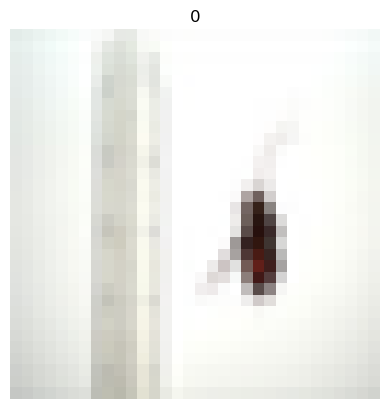

92 -> 92


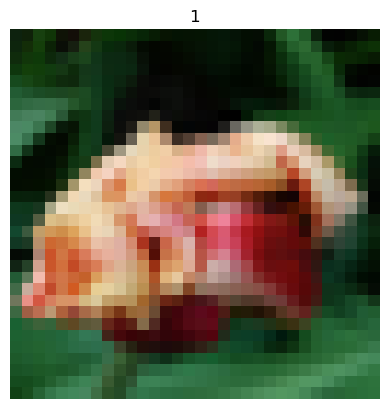

15 -> 22


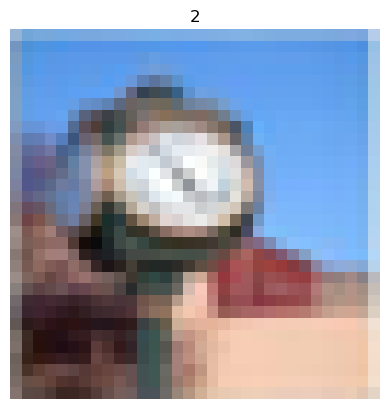

61 -> 64


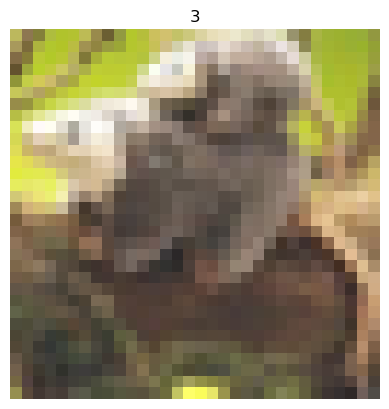

82 -> 83


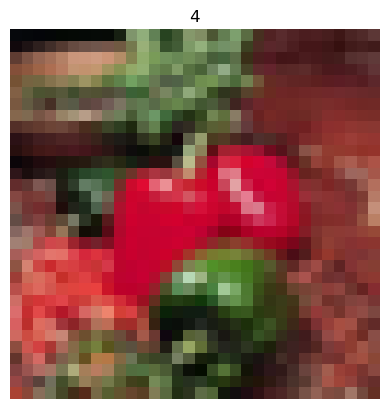

39 -> 44


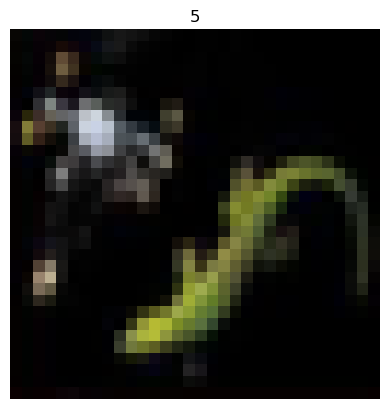

58 -> 61


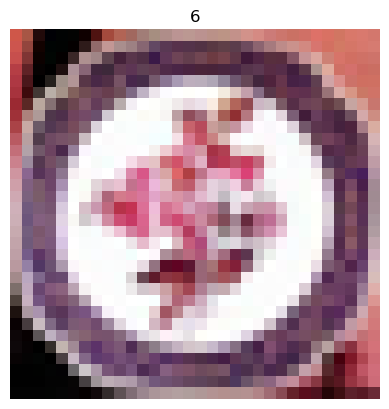

28 -> 34


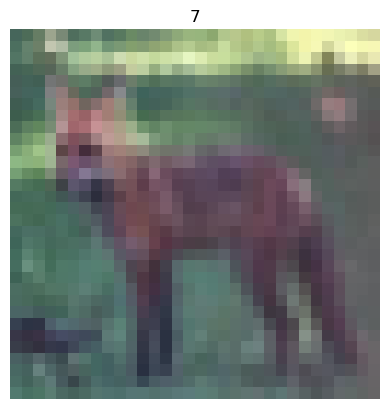

16 -> 23


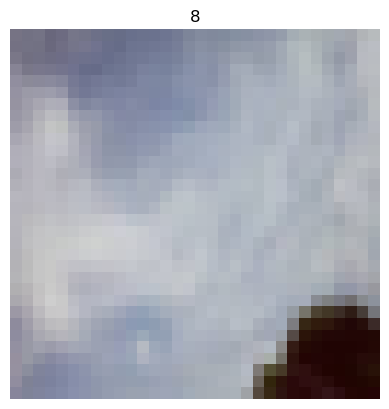

2 -> 10


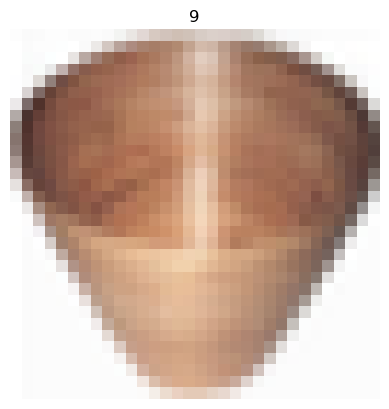

47 -> 51


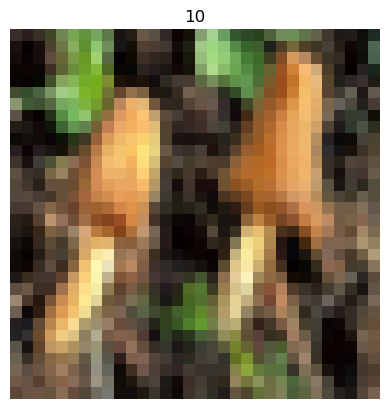

26 -> 32


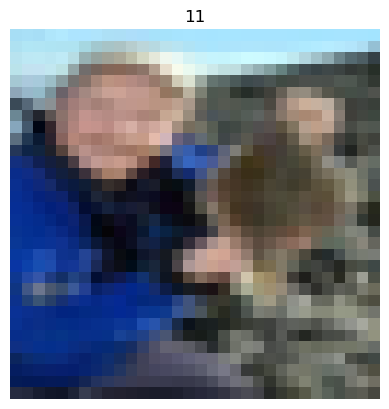

85 -> 86


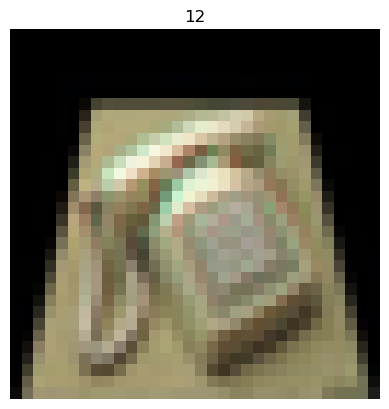

52 -> 56


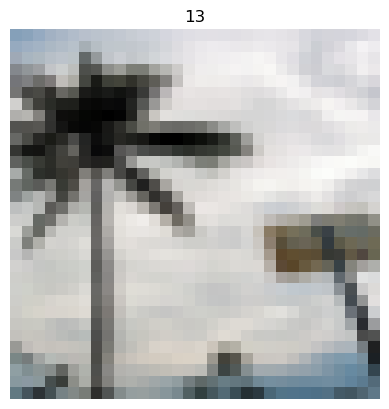

41 -> 46


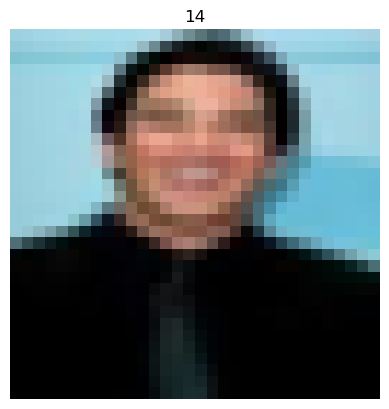

83 -> 84


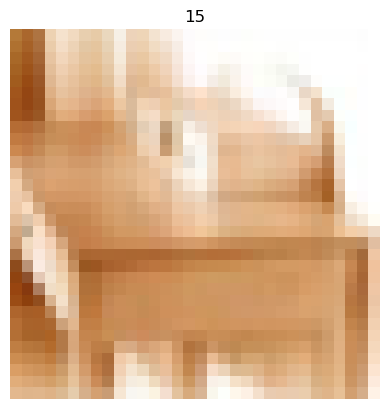

5 -> 13


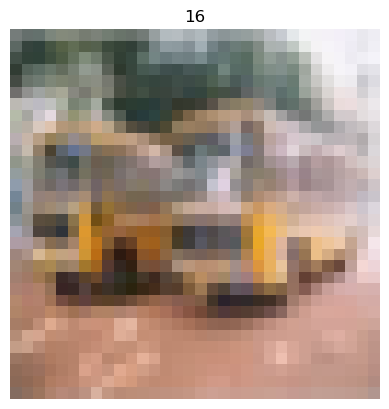

In [4]:
import matplotlib.pyplot as plt
 
simset = 6

if simset == 32 :
    # SHL
    labels= [83,80,58,44,1,52,9,29,46,14,6,23,69,91,54,5,76,78,62,70,50,90,13,56,95,21,82,11,43,65,71,51,34,12,8,66,79,63,72,24,10,67,27,77,41,49,17,53,18,98,92,47,26,25,7,31,59,20,42,89,48,68,32,86,81,37,85,87,39,97,4,16,75,94,0,93,57,40,74,88,30,33,99,38,3,64,36,15,73,19,84,28,96,2,35,55,22,61,60,45,75,14,97,29,69,24,69,64,25,43,62,12,87,43,40,27,9,21,83,63,56,69]

if simset == 52 :
    # AEI
    labels = [46,48,12,41,47,69,0,39,95,98,57,64,49,7,77,18,51,56,8,36,9,71,20,58,42,62,19,72,66,79,55,94,87,78,63,14,4,89,3,91,37,33,31,70,35,25,27,1,86,22,26,5,10,15,99,54,21,34,68,24,96,45,75,43,97,84,11,13,29,17,53,76,90,50,88,30,2,82,93,73,85,28,81,23,16,74,32,60,61,83,38,6,40,92,44,80,52,67,59,65,1,56,98,18,22,76,86,12,40,23,34,33,38,12,86,82,14,62,79,11,28,36]

if simset == 40 :
    # AM
    labels = [79,93,9,33,47,95,43,90,96,56,30,66,77,17,80,31,41,58,7,42,12,24,85,82,72,87,61,99,53,74,71,55,6,40,25,37,2,91,36,44,13,27,0,89,68,21,57,26,45,32,29,23,54,49,86,92,3,88,14,67,70,60,11,10,16,4,18,39,69,38,48,76,15,59,8,81,73,62,75,35,65,98,84,46,63,5,94,51,64,20,97,52,1,78,22,50,28,83,19,34,12,50,2,6,68,22,6,72,13,82,69,21,73,48,28,26,28,87,13,11,42,81]

if simset == 42 :
    # ASH
    labels = [55,11,28,82,5,0,69,29,47,79,35,27,60,68,65,19,84,1,80,3,63,24,81,87,25,64,96,99,66,62,4,91,46,36,78,94,77,92,48,49,12,89,33,45,56,76,83,37,20,44,90,57,38,23,73,10,54,53,75,7,67,34,40,21,14,59,93,17,58,72,15,30,51,52,70,6,95,71,9,2,85,31,88,74,26,8,97,86,61,50,13,98,22,42,16,18,41,39,32,43,11,13,46,30,78,47,44,84,10,45,98,76,39,40,71,31,84,17,11,7,67,23]

if simset == 49 :
    # THC
    labels = [1,10,93,33,43,91,18,71,92,86,39,56,64,77,75,6,55,49,9,95,80,52,50,13,61,19,45,67,70,20,98,46,5,53,63,26,84,40,15,28,34,24,89,60,16,78,30,12,69,38,54,88,59,51,27,76,58,79,72,73,36,17,8,48,81,37,31,68,3,2,7,62,99,14,44,65,66,87,23,25,4,21,0,96,42,22,47,11,35,57,41,85,32,74,82,94,90,83,29,97,83,79,45,86,80,56,90,63,62,40,91,9,32,56,20,72,25,47,44,23,82,86]

if simset == 11 :
    #  DI
    labels = [12,98,41,13,73,88,45,75,61,57,71,20,86,97,0,66,27,34,55,78,62,77,48,84,52,74,50,40,18,60,43,69,47,53,70,22,39,46,51,7,24,94,23,17,2,25,9,63,93,79,92,82,99,4,8,32,87,76,67,37,35,28,6,26,1,68,72,38,54,85,58,16,3,89,21,10,65,42,90,31,33,19,96,15,83,59,44,49,14,95,56,64,11,81,29,5,36,91,30,80,47,99,31,16,84,24,50,6,28,93,49,60,96,50,68,93,82,88,31,13,31,18]

if simset == 12 :
    #  DI
    labels = [50,82,78,71,97,86,7,64,51,99,58,44,41,85,73,12,95,66,15,83,87,23,31,4,54,29,16,96,92,56,70,24,38,89,25,88,1,49,34,19,94,62,28,75,67,81,36,46,69,11,55,84,2,47,53,20,48,91,35,32,93,5,33,37,60,40,77,74,52,0,63,72,27,80,68,22,10,8,6,3,98,76,65,79,21,30,9,57,59,42,18,90,39,26,13,45,17,61,43,14,73,97,20,93,35,95,97,23,92,71,10,85,55,0,1,33,60,40,99,67,31,24]

if simset == 28 :
    #  DM
    labels = [9, 77, 87]

if simset == 46 :
    #  DZ
    labels = [67, 5, 74]

if simset == 6:
    # SG
    labels = [17,92,15,61,82,39,58,28,16,2,47,26,85,52,41,83,5]

for idx, lbl in enumerate(labels):
    new_lbl = conv_alph_to_num(lbl)
    loc = np.where(cifar100_lables==new_lbl)[0][simset-1]
    # Display the image
    print(lbl, '->', cifar100[loc][1])
    plt.title(idx)
    plt.imshow(cifar100[loc][0])
    plt.axis('off')  # Disable axis
    plt.show()

